In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_widths

In [113]:
def ViewPulses(filelocation, events, XRange, preTrgrDly):
    with h5py.File(filelocation, 'r') as f:
        for a in range(events):
            pulse = np.array(f['raw_data'][a, :XRange])  # type: ignore
            baseline = np.average(pulse[:preTrgrDly-100])
            pulse = pulse - baseline
            plt.plot(pulse[preTrgrDly-100:])

def CreateSpectra(filelocation, events, XRange, preTrgrDly, risetime):
    with h5py.File(filelocation, 'r') as f:
        spectra = []
        for a in range(events):
            pulse = np.array(f['raw_data'][a, :XRange])  # type: ignore
            baseline = np.average(pulse[:preTrgrDly-100])
            pulse = pulse - baseline
            average = np.average(pulse[preTrgrDly-100:preTrgrDly+risetime])
            if average > 0:
                spectra.append(average)
        return(spectra)

def Gaussian(x, a, center, sigma, d):
    return a*np.exp(-(x-center)**2/(2*sigma**2))+d

def PeakInfo(hist, h, d, promF):
    peaklocations, _ = find_peaks(hist, height=h, distance=d, prominence=int(np.amax(hist))/promF)
    widths = peak_widths(hist, peaklocations, rel_height=0.5)
    Xranges = []
    coefficients = []
    numberofpeaks = 0
    FWHMs = []
    for i in range(len(peaklocations)):
        try:
            left = int(peaklocations[i]-widths[0][i])
            right = int(peaklocations[i]+widths[0][i])
            x = np.linspace(left, right, right-left)
            popt, pcov = curve_fit(Gaussian, x, hist[left:right], [hist[peaklocations[i]], peaklocations[i], widths[0][i], 0])
            Xranges.append(x)
            coefficients.append(popt)
            numberofpeaks += 1
            FWHMs.append(widths[0][i])
        except:
            pass
    return Xranges, coefficients, numberofpeaks, FWHMs


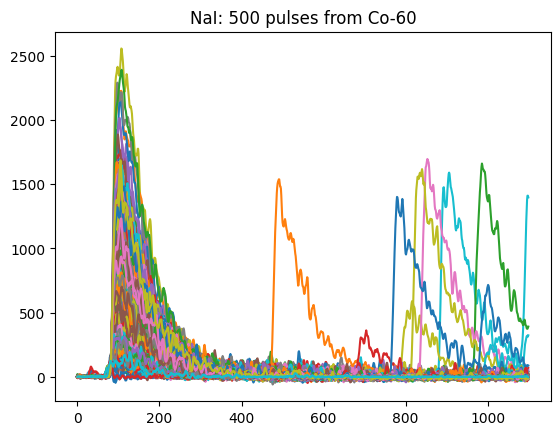

In [114]:
filelocation = r"C:\Users\devth\Documents\NE204Offline\NaI\Co60\NaI_Co60_120s.h5"
events = 500
XRange = 2000
preTrgrDly = 1000
ViewPulses(filelocation, events, XRange, preTrgrDly)
plt.title('NaI: 500 pulses from Co-60')
plt.show()

The initial pulses decay by about 400 counts in (1.6 microseconds)

Centroid is at: 254.06635916962517
FWHM is: 14.570388349514559
% Resolution = 5.7348750921355816
Centroid is at: 283.1030646877467
FWHM is: 12.887805609719521
% Resolution = 4.55233701688618


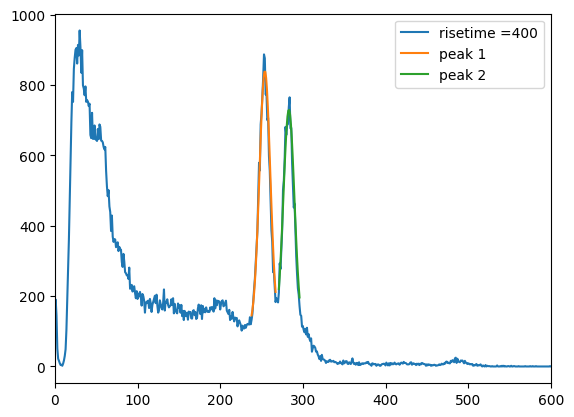

In [115]:
filelocation = r"C:\Users\devth\Documents\NE204Offline\NaI\Co60\NaI_Co60_120s.h5"
events = 100000
XRange = 2000
preTrgrDly = 1000
minpeakheight = 400
peakdistance = 10
prominencefactor = 2

risetime = 400

spectra = CreateSpectra(filelocation, events, XRange, preTrgrDly, risetime)

hist, bins = np.histogram(spectra, bins = 3000)
plt.plot(range(np.size(hist)), hist, label="risetime =" + str(risetime))

Xranges, coefficients, numberofpeaks, FWHMs = PeakInfo(hist, minpeakheight, peakdistance, prominencefactor)
for i in range(numberofpeaks):
    plt.plot(Xranges[i], Gaussian(Xranges[i], *coefficients[i]), label="peak " + str(i+1))
    print("Centroid is at: " + str(coefficients[i][1]))
    print("FWHM is: " + str(FWHMs[i]))
    print("% Resolution = " + str(100*FWHMs[i]/coefficients[i][1]))

plt.legend(loc='upper right')
plt.xlim(0, 600)
plt.show()

Centroid is at: 423.3867952814466
FWHM is: 23.39344262295083
% Resolution = 5.5253122874084974
Centroid is at: 471.83161405671865
FWHM is: 20.86174242424238
% Resolution = 4.421438030588302


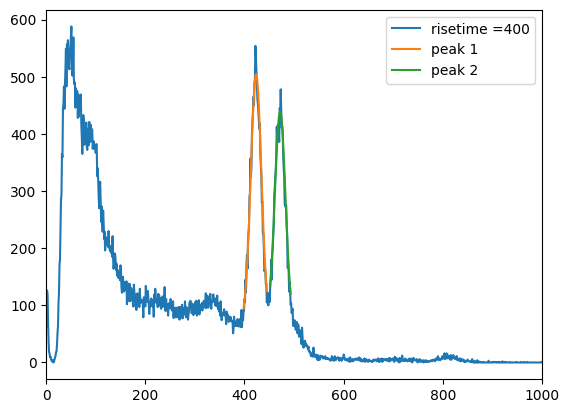

In [116]:
filelocation = r"C:\Users\devth\Documents\NE204Offline\NaI\Co60\NaI_Co60_120s.h5"
events = 100000
XRange = 2000
preTrgrDly = 1000
minpeakheight = 200
peakdistance = 10
prominencefactor = 2

risetime = 400

spectra = CreateSpectra(filelocation, events, XRange, preTrgrDly, risetime)

hist, bins = np.histogram(spectra, bins = 5000)
plt.plot(range(np.size(hist)), hist, label="risetime =" + str(risetime))

Xranges, coefficients, numberofpeaks, FWHMs = PeakInfo(hist, minpeakheight, peakdistance, prominencefactor)
for i in range(numberofpeaks):
    plt.plot(Xranges[i], Gaussian(Xranges[i], *coefficients[i]), label="peak " + str(i+1))
    print("Centroid is at: " + str(coefficients[i][1]))
    print("FWHM is: " + str(FWHMs[i]))
    print("% Resolution = " + str(100*FWHMs[i]/coefficients[i][1]))

plt.legend(loc='upper right')
plt.xlim(0, 1000)
plt.show()

Centroid is at: 846.7081956956505
FWHM is: 42.64166666666665
% Resolution = 5.0361702985090995
Centroid is at: 943.6993523188208
FWHM is: 40.52521929824559
% Resolution = 4.2942934313421555


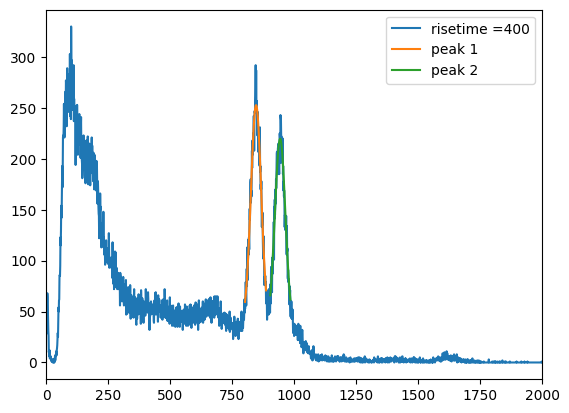

In [117]:
filelocation = r"C:\Users\devth\Documents\NE204Offline\NaI\Co60\NaI_Co60_120s.h5"
events = 100000
XRange = 2000
preTrgrDly = 1000
minpeakheight = 100
peakdistance = 10
prominencefactor = 2

risetime = 400

spectra = CreateSpectra(filelocation, events, XRange, preTrgrDly, risetime)

hist, bins = np.histogram(spectra, bins = 10000)
plt.plot(range(np.size(hist)), hist, label="risetime =" + str(risetime))

Xranges, coefficients, numberofpeaks, FWHMs = PeakInfo(hist, minpeakheight, peakdistance, prominencefactor)
for i in range(numberofpeaks):
    plt.plot(Xranges[i], Gaussian(Xranges[i], *coefficients[i]), label="peak " + str(i+1))
    print("Centroid is at: " + str(coefficients[i][1]))
    print("FWHM is: " + str(FWHMs[i]))
    print("% Resolution = " + str(100*FWHMs[i]/coefficients[i][1]))

plt.legend(loc='upper right')
plt.xlim(0, 2000)
plt.show()

In [118]:
filelocation = r"C:\Users\devth\Documents\NE204Offline\NaI\Co60\NaI_Co60_120s.h5"
events = 100000
XRange = 2000
preTrgrDly = 1000
minpeakheight = 100
peakdistance = 10
prominencefactor = 2

risetime = 100

for a in range(9):
    risetime = 100*(a+1)
    print("Integrating over " + str(risetime) + " counts")
    spectra = CreateSpectra(filelocation, events, XRange, preTrgrDly, risetime)
    hist, bins = np.histogram(spectra, bins = 10000)
    Xranges, coefficients, numberofpeaks, FWHMs = PeakInfo(hist, minpeakheight, peakdistance, prominencefactor)
    for i in range(numberofpeaks):
        print("% Resolution = " + str(100*FWHMs[i]/coefficients[i][1]))
    print("\n")


Integrating over 100 counts
% Resolution = 5.4887915004482695
% Resolution = 4.3260570593277095


Integrating over 200 counts
% Resolution = 5.192406040377218
% Resolution = 4.266645817652379


Integrating over 300 counts
% Resolution = 5.348223496669577
% Resolution = 4.132263933957161


Integrating over 400 counts
% Resolution = 5.0361702985090995
% Resolution = 4.2942934313421555


Integrating over 500 counts
% Resolution = 5.671794430434942
% Resolution = 4.640912437543736


Integrating over 600 counts
% Resolution = 4.890147753124946
% Resolution = 4.451175510281586


Integrating over 700 counts
% Resolution = 5.61360064150568
% Resolution = 4.001064207859522


Integrating over 800 counts
% Resolution = 5.8015605247783775
% Resolution = 4.324147929419728


Integrating over 900 counts
% Resolution = 5.621404392631678
% Resolution = 3.8813690876331326


